# ECE324: Assignment 3

Aman Bhargava
1005189733

In [164]:
##############
# IMPORT BOX #
##############
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import scipy

import util as utl

### 3.1: Initial Data Tasks:
- [x] Take a gander at `adult.csv`.
- [x] Use `pd.read_csv()` to read the `adult.csv` data into `data`.

In [2]:
data = pd.read_csv('data/adult.csv')

### 3.2: Sanity Checks:
- [x] Print the `.shape` field of the dataframe.
- [x] Print the `.columns` field of the dataframe (column names).
- [x] Print the `.head()` of the dataframe.
- [x] Use the `data['income'].value_counts()` to determine the number of high and low income earners.

In [3]:
print('Shape of dataframe: {}'.format(data.shape))
print('Columns of dataframe: {}'.format(data.columns))
print('Number of high and low-income individuals:')
data['income'].value_counts()

Shape of dataframe: (48842, 15)
Columns of dataframe: Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
Number of high and low-income individuals:


<=50K    37155
>50K     11687
Name: income, dtype: int64

In [4]:
print('Head of dataframe:')
data.head()

Head of dataframe:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 3.3: Cleaning:
- [x] Missing values are indicated by the "?" string. Figure out **how many missing values** there are.
    - [x] Do this by iterating over the columns and use the `.isin("?").sum()` function.
- [x] Remove any row that has ≥1 "?" value. Use `[data[data[column != value]]]`
- [x] Print out the shape of the dataset.

In [5]:
num_question_marks = 0
for column in data.columns: 
    num_question_marks += data.isin({column: ["?"]}).sum().sum()

print("The number of question marks is: {}".format(num_question_marks))

The number of question marks is: 6465


In [6]:
for column in data.columns:
    data = data[data[column] != "?"]

In [7]:
print("The new shape of the cleaned data is: {}".format(data.shape))

The new shape of the cleaned data is: (45222, 15)


### 3.4: Balancing the Dataset
- [x] Use `DataFrame.sample` function to balance the dataset. 
    - [x] Use the `random_state` argument to ensure same results each time.

In [8]:
num_from_each = min(data['income'].value_counts())
random_seed = 314

high_income_set = data[data['income'] == ">50K"].sample(n=num_from_each, random_state=random_seed)
low_income_set = data[data['income'] == "<=50K"].sample(n=num_from_each, random_state=random_seed)

data = pd.concat([high_income_set, low_income_set])
data['income'].value_counts()

<=50K    11208
>50K     11208
Name: income, dtype: int64

### 3.5: Visualization and Understanding
- [x] Use the `.describe()` function in the DataFrame class to determine statistics on data.
- [x] Use `verbose_print` method. Ensure the following information is there.
    - [x] Count (number of samples with non-null values)
    - [x] Mean
    - [x] Standard deviation
    - [x] Minimum
    - [x] Lowest 25% of the field.
- [x] Print the number of times each value of the **categorical** features occur in the dataset.
    - [x] Use `pie_chart` from `util.py` to visualize the first 3 categorical features using pie charts.
    - [ ] Include these plots in your final report.
- [x] Use the `binary_bar_chart` method to plot the binary bar graph for the first 3 categorical features.
    - [ ] Include charts in the report.

In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,22416.000000,2.241600e+04,22416.000000,22416.000000,22416.000000,22416.000000
mean,40.475107,1.891181e+05,10.605327,2066.442853,122.727159,42.624019
std,12.638850,1.045542e+05,2.593419,10532.908953,475.851448,11.856295
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.179062e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.778580e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.364150e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3683.000000,99.000000


In [10]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [131]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
non_categorical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


for category in categorical_columns:
    print("\nCATEGORY: {}".format(category))
    print(data[category].value_counts())


CATEGORY: workclass
Private             15810
Self-emp-not-inc     1999
Local-gov            1635
Self-emp-inc         1154
State-gov             959
Federal-gov           855
Without-pay             4
Name: workclass, dtype: int64

CATEGORY: education
HS-grad         6436
Bachelors       4651
Some-college    4575
Masters         1734
Assoc-voc       1004
Assoc-acdm       770
Prof-school      656
11th             590
10th             479
Doctorate        439
7th-8th          319
9th              258
12th             240
5th-6th          167
1st-4th           79
Preschool         19
Name: education, dtype: int64

CATEGORY: marital-status
Married-civ-spouse       13356
Never-married             5227
Divorced                  2556
Separated                  531
Widowed                    501
Married-spouse-absent      224
Married-AF-spouse           21
Name: marital-status, dtype: int64

CATEGORY: occupation
Exec-managerial      3914
Prof-specialty       3777
Craft-repair         2902
Sa

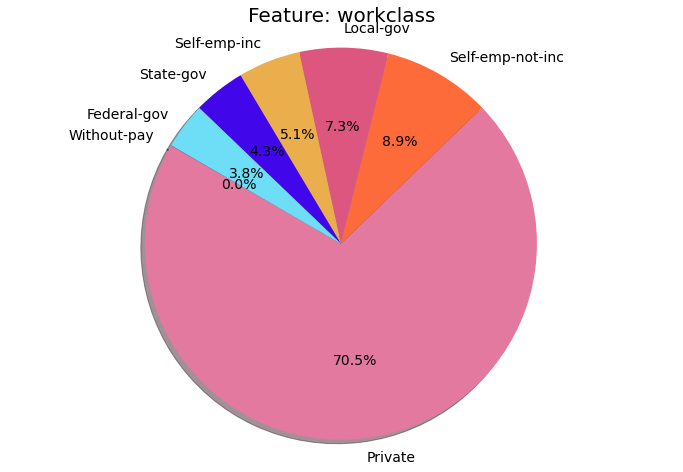

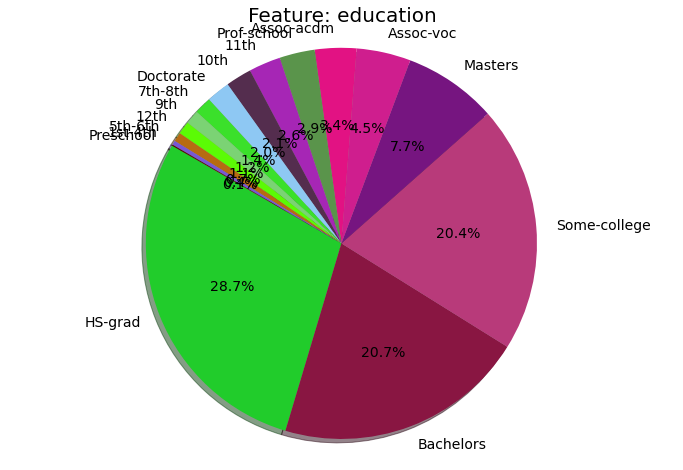

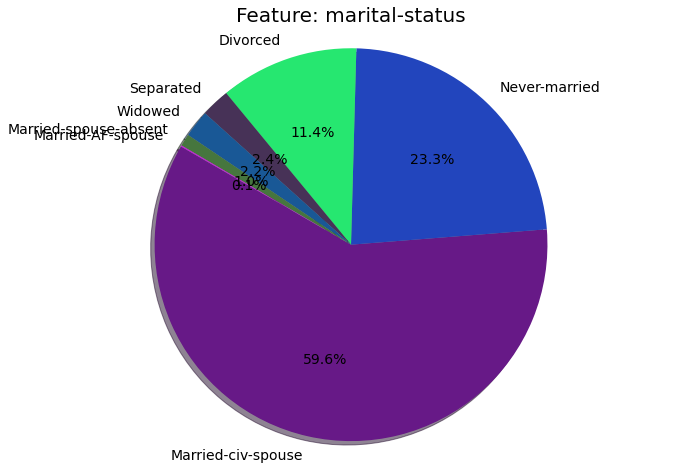

In [94]:
for i in range(3):
    utl.pie_chart(data, categorical_columns[i])

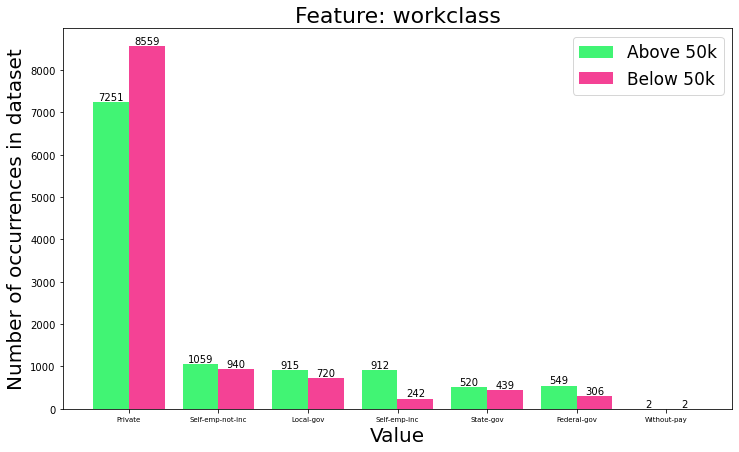

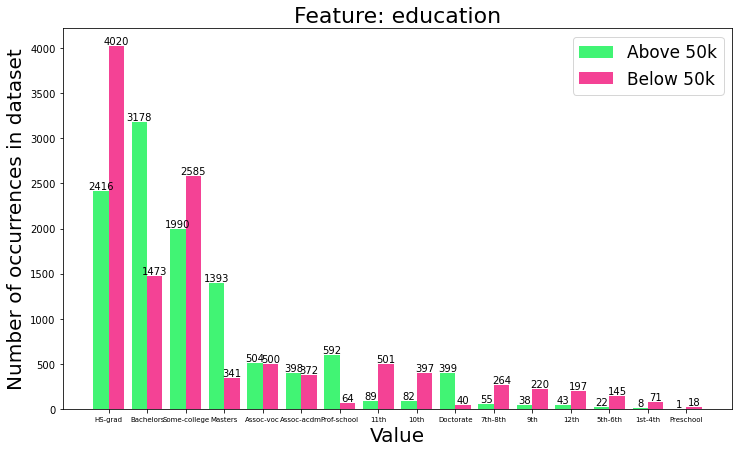

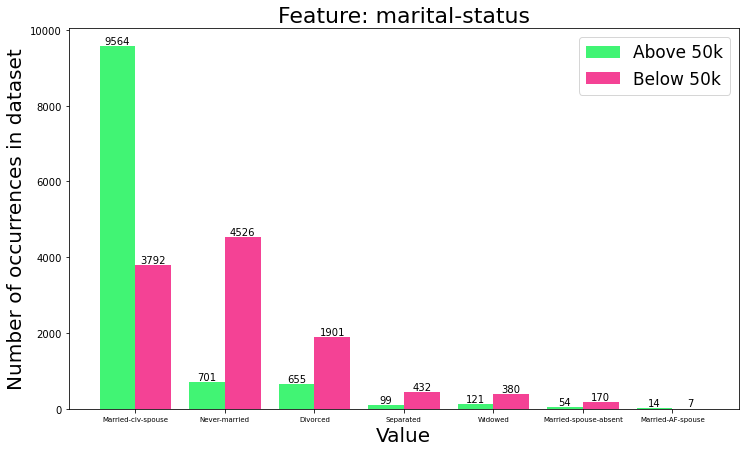

In [95]:
for i in range(3):
    utl.binary_bar_chart(data, categorical_columns[i])

### 3.6: Pre-Processing
Continuous values should be normalized -> mean = 0, standard deviation = 1. Categorical features should be encoded as 1-hot vectors.

- [x] Extract continuous features into a separate variable.
    - [x] Subtract the average (`.mean()`) and divide by the standard deviation (`.std()`).
    - [x] Return numpy representation using `.values`.
- [x] Use `LabelEncoder` class from sklearn to turn categorical features into integers.
    - [x] Use `OneHotEncoder` class from sklearn to convert integers into 1-hot vectors.
    - [x] Call `fit_transform` in `LabelEncoder` to convert (back to?) integer representation. 
    - [ x Be sure to include the "income" column!
- [x] Extract the `income` column and store it as a separate variable (numpy array).
    - [x] Do not convert to 1-hot.
    - [x] Remove "income" field from feature DataFrame -> separate features from the label.
    - [x] use OneHotEncoder class to convert each categorical feature from integer to one-hot.
    - [x] Stitch the categorical and continuous features back together.

In [97]:
def normalize_df(cts_data_in):
    """
    Returns the normalized numpy representation of an input dataframe of continuous values.
    """
    for column in cts_data_in.columns:
        cts_data_in[column] -= cts_data_in[column].mean()
        cts_data_in[column] /= cts_data_in[column].std()
    
    return cts_data_in.values

In [141]:
def integer_encode_df(cat_data_in):
    """
    Returns the integer encoded numpy representation of an input categorical dataframe.
    Also returns the set of label encoders (one for each column)
    """

    label_encoders = []
    integer_array_list = []

    for column in cat_data_in.columns:
        le_tmp = preprocessing.LabelEncoder()
        le_tmp.fit(cat_data_in[column].values)
        integers = le_tmp.transform(cat_data_in[column].values)
        integer_array_list.append(np.expand_dims(integers, axis=1))
        label_encoders.append(le_tmp)

    numpy_int_arry = np.concatenate(integer_array_list, axis=1)

    return numpy_int_arry, label_encoders

def integer_encode_income(cat_data_in):

    le_tmp = preprocessing.LabelEncoder()
    le_tmp.fit(cat_data_in['income'].values)
    integers = le_tmp.transform(cat_data_in['income'].values)

    return integers

def one_hot_encode_ints(int_array):
    """
    Returns the one-hot-encoded numpy representation of an input integer-encoded array.
    Also returns the set of OneHotEncoders (one for each column)
    """

    encoders = []
    one_hot_arrays = []

    for i in range(int_array.shape[1]):
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(int_array[:,i].reshape(-1,1))
        one_hot_arrays.append(enc.transform(int_array[:,1].reshape(-1,1)))
        encoders.append(enc)

    one_hot_mat = scipy.sparse.hstack(one_hot_arrays)

    return one_hot_mat, encoders

In [127]:
def get_data_matrix(data, categorical_columns, non_categorical_columns):
    cat_data = data[categorical_columns]
    cts_data = data[non_categorical_columns]
    
    cts_data_np = normalize_df(cts_data)
    cts_data_np.shape

    np_int_arry, int_label_encoders = integer_encode_df(cat_data)
    np_int_arry.shape
    one_hot_mat, encoders = one_hot_encode_ints(np_int_arry)
    one_hot_numpy = one_hot_mat.toarray()

    data_matrix = np.concatenate( [one_hot_numpy, cts_data_np], axis=1)
    return data_matrix

In [151]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
non_categorical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Final matrices
X = get_data_matrix(data, categorical_columns, non_categorical_columns)
Y = integer_encode_income(data) 
Y.shape

(22416,)

In [152]:
X.shape

(22416, 103)

### 3.7: Training-Validation Split
- [x] Use `train_test_split` function from sklearn to separate training and validation sets.
    - [x] `test_size` = percentage of data used for testing portion (0 => all data in training). 
    - [x] Set `test_size=0.2`. 
    - [x] Ensure you use a specified random seed for reproducibility.

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 4: Model Training (18 Points)

Stochastic gradient descent: Selects random subset of data of fixed size (`mini-batch` or `batch` size) to perform gradient descent + parameter change. Epoch occurs once all mini-batches are used once. 

### 4.1: DataSet
- [ ] Use PyTorch `DataLoader` to manage batch sampling in training loop.
    - [ ] Define dataset class extending PyTorch `data.Dataset`.
    - [ ] Refer to [this tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)
    - [ ] Code has been started in `dataset.py`. Complete the implementation for `AdultDataset` class.